In [41]:
#importing libraries 
import numpy as np  
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
df=pd.read_csv("Seattle_WeatherPredicton.csv",sep=",")
temp_max=df["temp_max"]
precipitation=df["precipitation"]


df.head(30)

,date,precipitation,temp_max,temp_min,wind_speed,weather
0,04-01-2012,1.5,8.9,4.4,6.8,rain
1,04-02-2012,0.0,16.7,4.4,3.1,sun
2,04-03-2012,1.5,11.7,3.3,3.1,rain
3,04-04-2012,0.0,10.6,2.8,2.1,sun
4,04-05-2012,4.6,9.4,2.8,1.8,snow
5,04-06-2012,0.3,11.1,3.3,2.6,rain
6,04-07-2012,0.0,16.1,1.7,4.3,sun
7,04-08-2012,0.0,21.1,7.2,4.1,sun
8,04-09-2012,0.0,20.0,6.1,2.1,sun
9,04-10-2012,0.0,17.8,8.9,3.2,rain


In [27]:
x = np.array(temp_max).reshape(-1, 1)
y = np.array(precipitation)

In [28]:
#Splitting the data into Train and Test
from sklearn.model_selection import train_test_split 
xtrain, xtest, ytrain, ytest = train_test_split(  x, y, test_size=1/2, random_state=1 )

In [29]:
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression()
regressor.fit( xtrain, ytrain )

LinearRegression()

In [30]:
print(df.shape)  #checking dimensions of Dataset

(275, 6)


In [31]:
#Data Preprocessing to clean, organize the data  and read-to-feed to the Machine Learning model.

In [32]:
print(df.info()) #converting raw data to a suitable format

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   date                    275 non-null    object 
 1   precipitation           275 non-null    float64
 2   temp_max                275 non-null    float64
 3   temp_min                275 non-null    float64
 4               wind_speed  275 non-null    float64
 5   weather                 275 non-null    object 
dtypes: float64(4), object(2)
memory usage: 13.0+ KB
None


In [33]:
df.isnull().sum()*100/len(df)  #checking for null values

date                      0.0
precipitation             0.0
temp_max                  0.0
temp_min                  0.0
            wind_speed    0.0
weather                   0.0
dtype: float64

In [34]:
regressor.coef_ , regressor.intercept_   #y = mx + c  where m is coefficient , c is intercept

(array([-0.33190618]), 8.963659171104002)

In [35]:
actualValue = ytrain
predictedValue = regressor.predict(xtrain) 
xtrain[0], actualValue[0] , predictedValue[0]

(array([8.3]), 0.0, 6.208837901991238)

In [36]:
regressor.coef_ * xtrain[0] + regressor.intercept_ #y = mx + c

array([6.2088379])

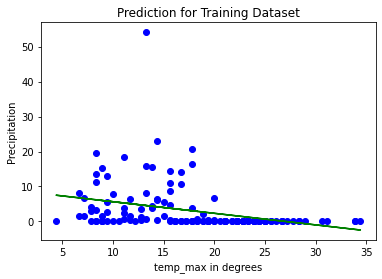

In [37]:
# Actual values
plt.scatter(xtrain, ytrain, color='blue') # x = xtrain , y = ytrain

#Predicted values
prediction = regressor.predict(xtrain)
plt.plot(xtrain, prediction , color = 'green') # y = prediction

plt.title ("Prediction for Training Dataset")
plt.xlabel("temp_max in degrees"), plt.ylabel("Precipitation")
plt.show()

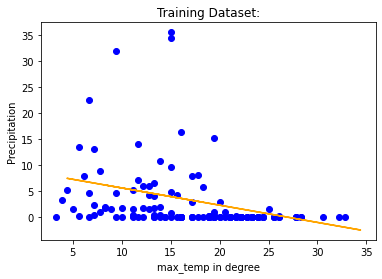

In [38]:
plt.scatter(xtest, ytest, color= 'blue')

plt.plot(xtrain, regressor.predict(xtrain), color = 'orange')

plt.title ("Training Dataset:")
plt.xlabel("max_temp in degree"), plt.ylabel("Precipitation")
plt.show()

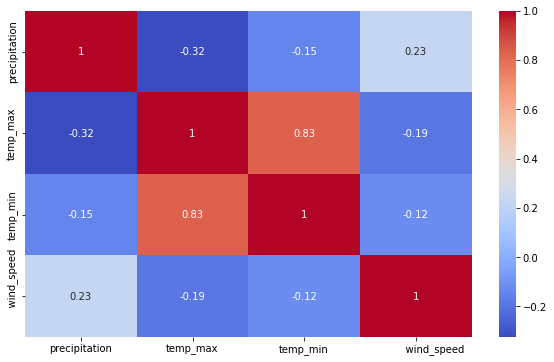

In [39]:
cor = df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(cor,annot=True , cmap='coolwarm')
plt.show()

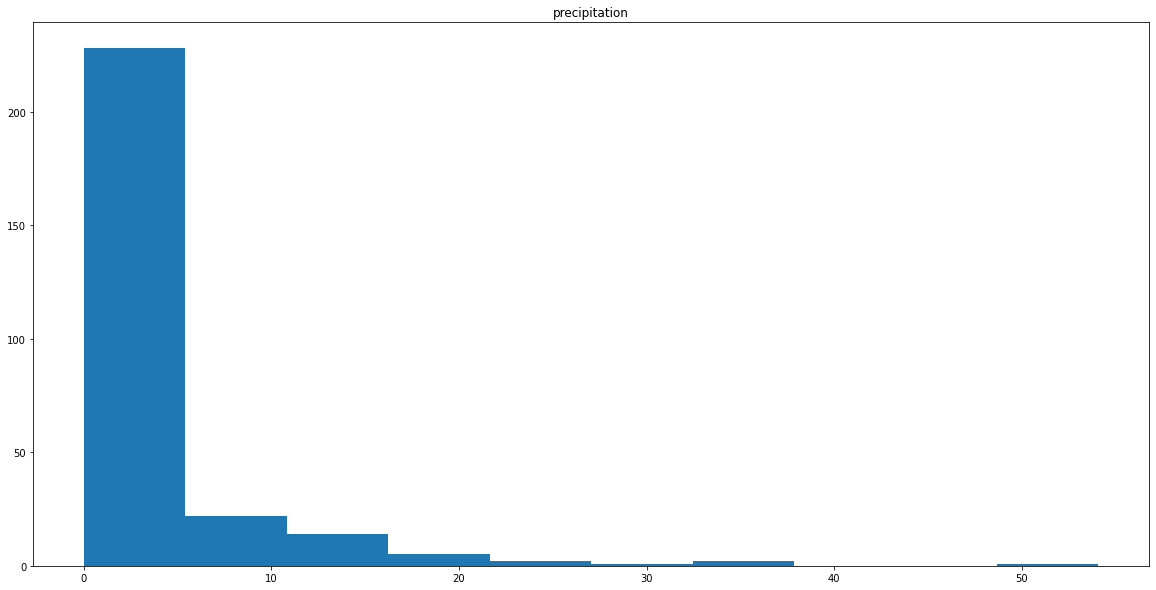

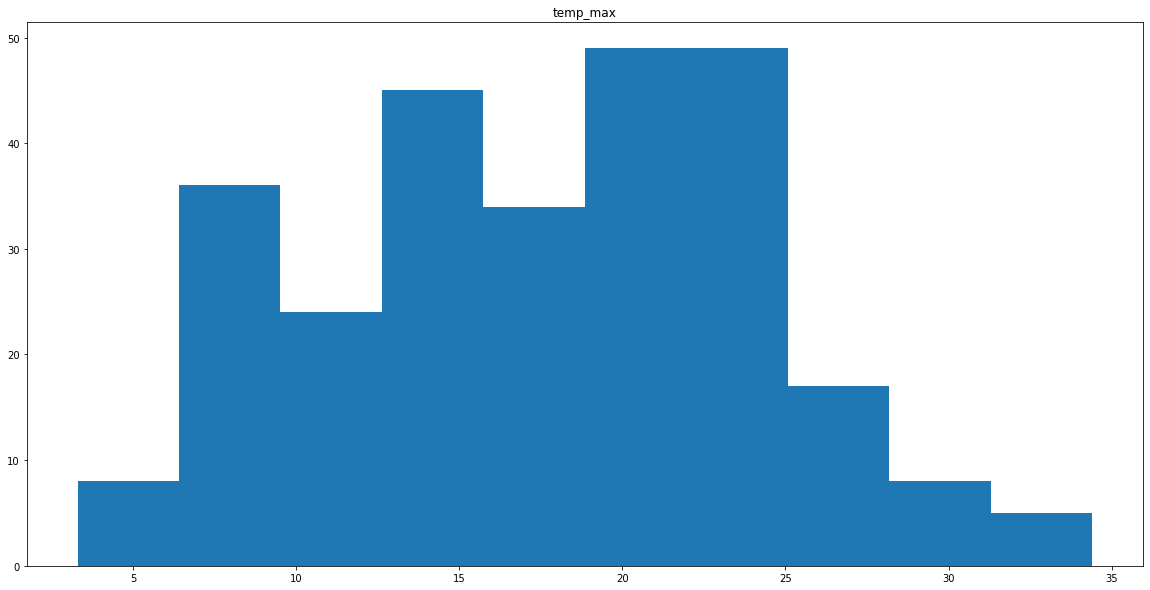

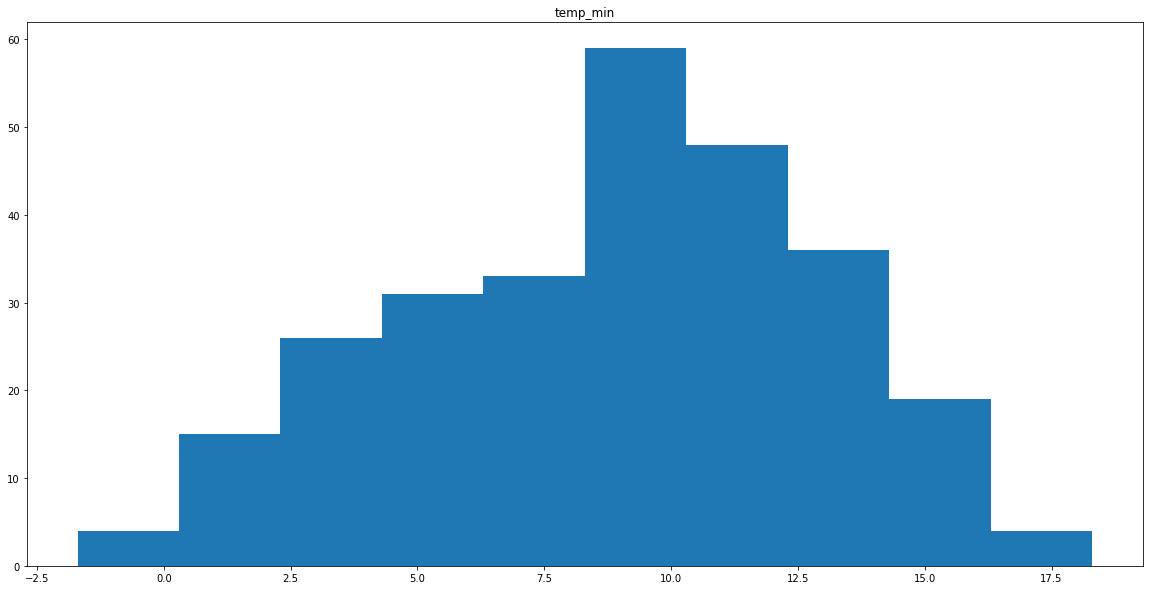

In [40]:
data = ["precipitation","temp_max","temp_min"]
for col in data:
    plt.figure(figsize=(20,10))
    plt.hist(df[col])
    plt.title(col)
    plt.show()